[Think Stats Chapter 5 Exercise 1](http://greenteapress.com/thinkstats2/html/thinkstats2006.html#toc50) (blue men)

This is a classic example of hypothesis testing using the normal distribution.  The effect size used here is the Z-statistic. 

In the BRFSS (see The Lognormal Distribution), the distribution of heights is roughly normal with parameters `mu` = 178 cm and `sigma` = 7.7 cm for men, and `mu` = 163 cm and `sigma` = 7.3 cm for women.

In order to join Blue Man Group, you have to be male and between 5′10″ and 6′1″ tall. What percentage of the US male population is in this range? Hint: use `scipy.stats.norm.cdf`.

This notebook has been converted to a markdown file using [convert_notebooks_to_markdown.py](./convert_notebooks_to_markdown.py).

# Answer

Approximately 34% of the US male population has a height within the range allowable by the Blue Man Group (5'10" or 177.8 cm to 6'1" or 185.4 cm).



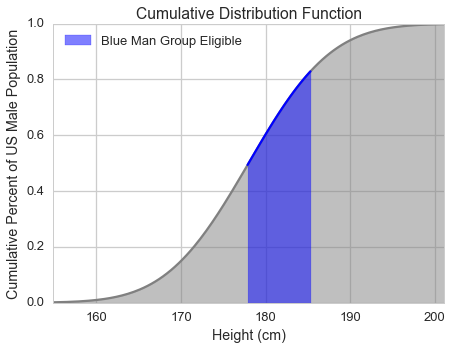

In [8]:
print('Approximately {:.0f}% of the US male population has a height within the range allowable by the Blue Man Group (5\'10\" or {:.1f} cm to 6\'1\" or {:.1f} cm).'
      .format(percentile_diff_2*100, height_min, height_max))
print('')
plt.show()

# Code

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.close_figures = False

Begin by converting the two height limits to centimeters.

In [2]:
in_to_cm = 2.54

height_min = (5 * 12 + 10) * in_to_cm
height_max = (6 * 12 + 1) * in_to_cm

print('Height range in centimeters is {:.1f} - {:.1f}.'
      .format(height_min, height_max))

Height range in centimeters is 177.8 - 185.4.


Setup the male height distribution properties.

In [3]:
mu  = 178.0
sigma = 7.7

## Method 1

Compute the two Z-statistics for the height minimum and maximum and then calculate the differences in their CDFs.

In [4]:
z_calc = lambda x, mu, sigma: (x - mu) / sigma

z_min = z_calc(height_min, mu, sigma)
z_max = z_calc(height_max, mu, sigma)

In [5]:
percentile_min = stats.norm.cdf(z_min)
percentile_max = stats.norm.cdf(z_max)

percentile_diff_1 = percentile_max - percentile_min

print('The two percentiles are {:.2f} and {:.2f}, and their difference is {:.2f}.'
      .format(percentile_min, percentile_max, percentile_diff_1))

The two percentiles are 0.49 and 0.83, and their difference is 0.34.


## Method 2

Use `scipy.stats.norm.cdf` to directly calculate the percentile difference by supplying `mu` and `sigma` to the function.

In [6]:
percentile_min = stats.norm.cdf(height_min, mu, sigma)
percentile_max = stats.norm.cdf(height_max, mu, sigma)

percentile_diff_2 = percentile_max - percentile_min

assert np.allclose(percentile_diff_1, percentile_diff_2)

print('The percentile range from the second method is {:.2f}.'
      .format(percentile_diff_2))

The percentile range from the second method is 0.34.


## Visualize

Plot the CDF and highlight the range of heights that are eligible for the Blue Man Group.

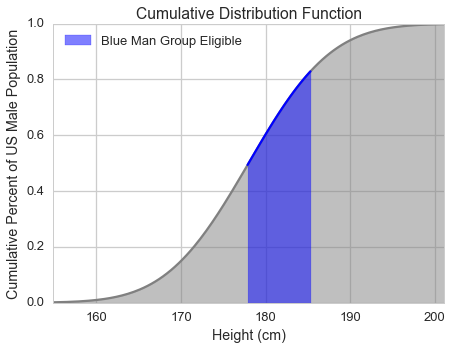

In [7]:
height_range = np.linspace(mu-3*sigma, mu+3*sigma, 200)
height_mask = (height_range>=height_min) & (height_range<=height_max)

cdf = stats.norm.cdf(height_range, mu, sigma)

sns.set_context('talk')
sns.set_style('whitegrid')

fig = plt.figure()
fig.set_size_inches(7, 5)

ax = plt.axes()

# Plot and shade the distribution
ax.plot(height_range, cdf, color='gray')
ax.fill_between(height_range, cdf, 
                 color='gray', alpha=0.5)

# Plot and shade the desired region
ax.plot(height_range[height_mask],cdf[height_mask], 
         color='blue')
ax.fill_between(height_range[height_mask],cdf[height_mask], 
                color='blue', alpha=0.5, 
                label='Blue Man Group Eligible')


ax.set_xlim(height_range.min(), height_range.max())
ax.set_xlabel('Height (cm)')
ax.set_ylabel('Cumulative Percent of US Male Population')
ax.legend(loc=2)
_ = ax.set_title('Cumulative Distribution Function')
